In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Data Generation

x^2+5*x+3

In [3]:
x = np.arange(-80,81,0.5)
y = x**2+5*x+3


In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_test.shape

(65,)

In [5]:
model_2 = keras.Sequential()
model_2.add(keras.layers.Dense(units=256,activation='relu',input_shape=[1]))
model_2.add(keras.layers.Dense(units=256,activation='relu'))
model_2.add(keras.layers.Dense(units=256,activation='relu'))
model_2.add(keras.layers.Dense(units=256,activation='relu'))
model_2.add(keras.layers.Dense(units=1))



c:\Users\Arash\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.0001)
loss = keras.losses.MeanSquaredError()
metric = keras.metrics.RootMeanSquaredError()
model_2.compile(optimizer=optimizer,loss=loss,metrics=[metric])

In [16]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=300,restore_best_weights=True)

In [18]:
hist = model_2.fit(x_train,y_train,epochs=1000,batch_size=128,callbacks=[early_stop],validation_data=(x_test,y_test))

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 386236.7812 - root_mean_squared_error: 621.4586 - val_loss: 401954.1875 - val_root_mean_squared_error: 633.9986
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 378028.6250 - root_mean_squared_error: 614.8333 - val_loss: 414259.6562 - val_root_mean_squared_error: 643.6301
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 396126.1250 - root_mean_squared_error: 629.3035 - val_loss: 422970.0625 - val_root_mean_squared_error: 650.3615
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 400468.3750 - root_mean_squared_error: 632.8016 - val_loss: 402525.2188 - val_root_mean_squared_error: 634.4487
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 387048.0000 - root_mean_squared_error: 622.1113 - val_loss: 401027.9062 - val_root_mean_squared_error: 633.2676
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 378617.3750 - root_mean_squared_error: 615.3042 - val_loss: 399616.0625 - val_root_mean_

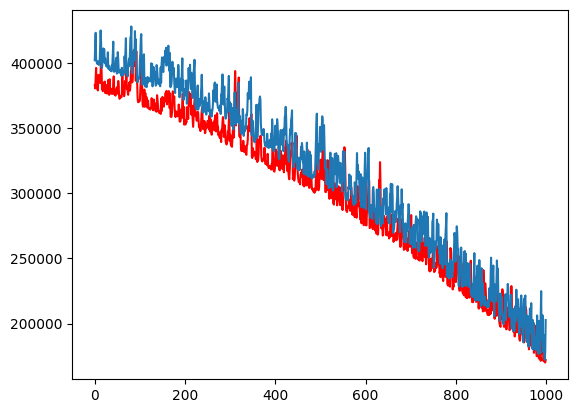

In [19]:
plt.plot(hist.history['loss'],color="red")
plt.plot(hist.history['val_loss'])
plt.show()